In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
v1 = pd.read_csv('data/aave_usdc_interest_v1.csv') 
v2 = pd.read_csv('data/aave_usdc_interest_v2.csv')
v1['version'] = 'v1'
v2['version'] = 'v2'

In [41]:
df = pd.concat([v1, v2], ignore_index=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.strftime('%d-%m-%Y')

In [42]:
df

,asset,epoch,timestamp,supply,borrow,supply_ma30,borrow_ma30,version,date
0,usdc,1603756115,2020-10-26 23:48:35,0.058663,0.073410,0.020983,0.043198,v1,26-10-2020
1,usdc,1603843191,2020-10-27 23:59:51,0.089503,0.106314,0.022652,0.044571,v1,27-10-2020
2,usdc,1603929017,2020-10-28 23:50:17,0.061310,0.074790,0.025311,0.047126,v1,28-10-2020
3,usdc,1604015978,2020-10-29 23:59:38,0.058967,0.073245,0.030098,0.048395,v1,29-10-2020
4,usdc,1604101448,2020-10-30 23:44:08,0.047964,0.065975,0.031305,0.049483,v1,30-10-2020
...,...,...,...,...,...,...,...,...,...
670,usdc,1661558163,2022-08-26 23:56:03,0.004584,0.014537,0.005647,0.015740,v2,26-08-2022
671,usdc,1661644615,2022-08-27 23:56:55,0.004573,0.014524,0.005594,0.015684,v2,27-08-2022
672,usdc,1661731149,2022-08-28 23:59:09,0.003835,0.013252,0.005554,0.015603,v2,28-08-2022
673,usdc,1661816834,2022-08-29 23:47:14,0.003813,0.013222,0.005457,0.015466,v2,29-08-2022


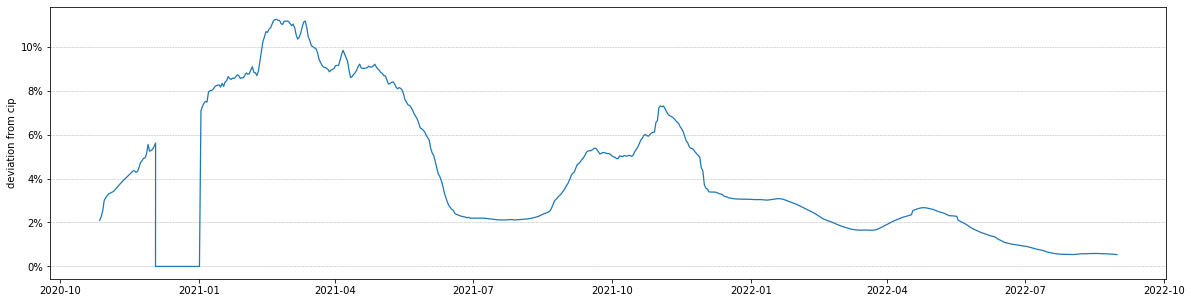

In [49]:
fig, ax = plt.subplots(figsize =(20,5))

ax.plot(df['timestamp'], df['supply_ma30'], linewidth=1.25)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


ax.set_ylabel('deviation from cip')
ax.grid(axis='y', linestyle='--', linewidth=.5)

left, right = plt.xlim()
ax.set_xlim(left+1, right-1)

plt.show()

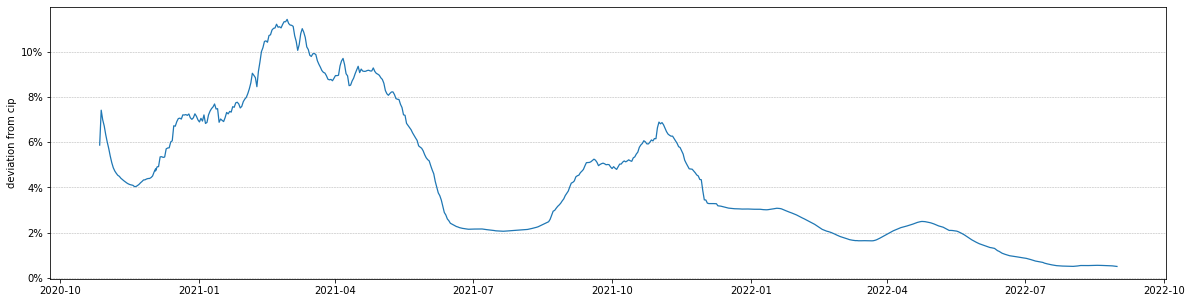

In [50]:
fig, ax = plt.subplots(figsize =(20,5))

ax.plot(df['timestamp'], df['supply'].rolling(30, min_periods=1).mean(), linewidth=1.25)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


ax.set_ylabel('deviation from cip')
ax.grid(axis='y', linestyle='--', linewidth=.5)

left, right = plt.xlim()
ax.set_xlim(left+1, right-1)

plt.show()